In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
import gseapy as gp
import seaborn as sns
import anndata as ad

from tqdm import tqdm
from scripts import constants

In [2]:
dataset = "zheng_2017"

In [3]:
adata = sc.read_h5ad(
    os.path.join(
        constants.DEFAULT_DATA_PATH,
        f"{dataset}/preprocessed/adata_top_2000_genes.h5ad",
    )
)

In [4]:
genes = pd.read_table(
    os.path.join(
        "/projects/leelab/data/single-cell/zheng_2017",
        "aml027_post_transplant_filtered_gene_bc_matrices",
        "filtered_matrices_mex/hg19",
        "genes.tsv",
    ),
    header=None,
)
genes = genes.rename(columns={0: "ensembl_id", 1: "gene_symbol"})
genes = genes[genes["ensembl_id"].isin(adata.var.index)]

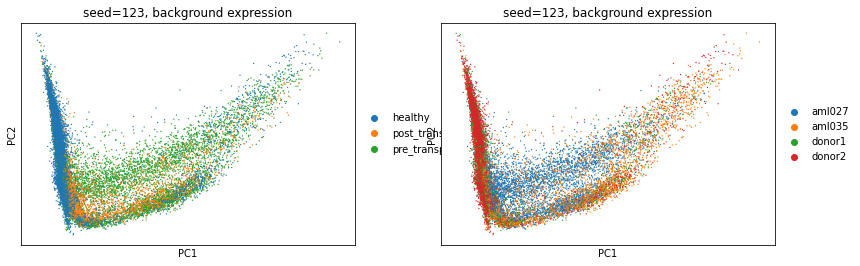

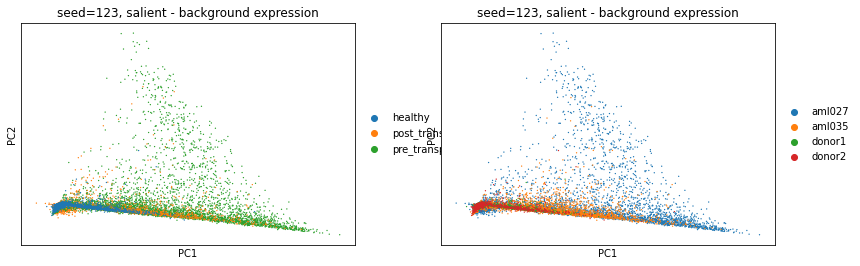

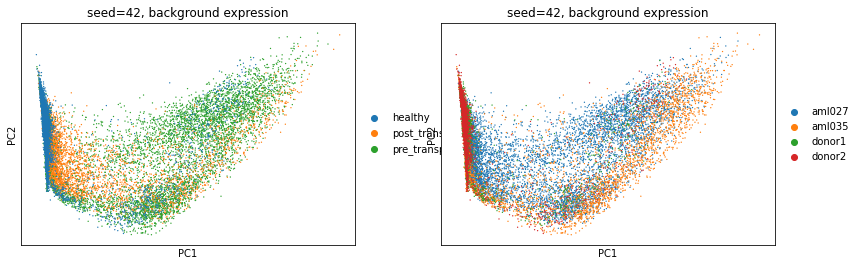

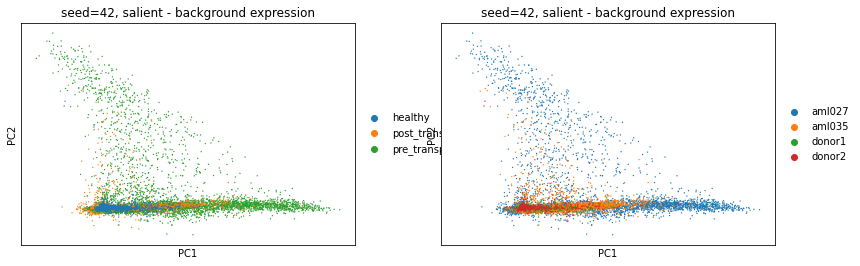

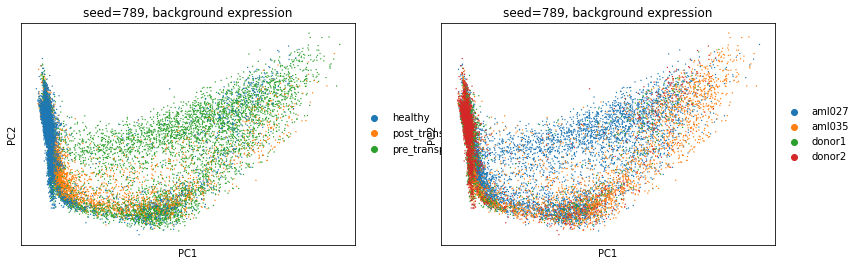

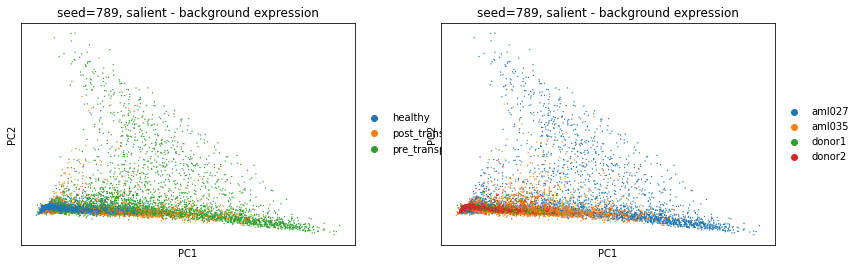

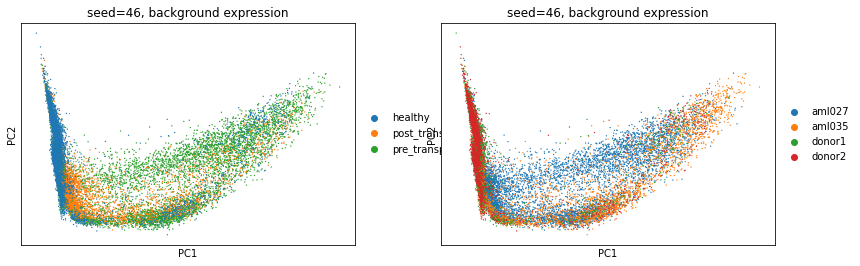

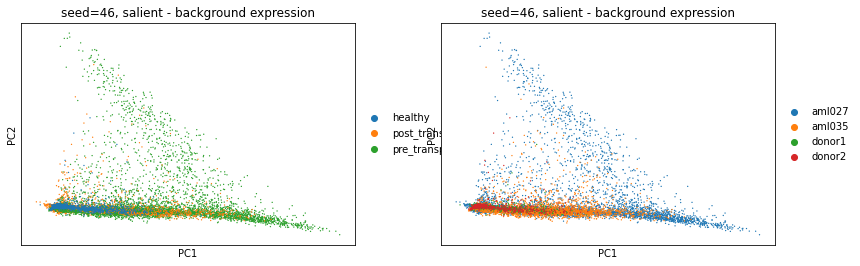

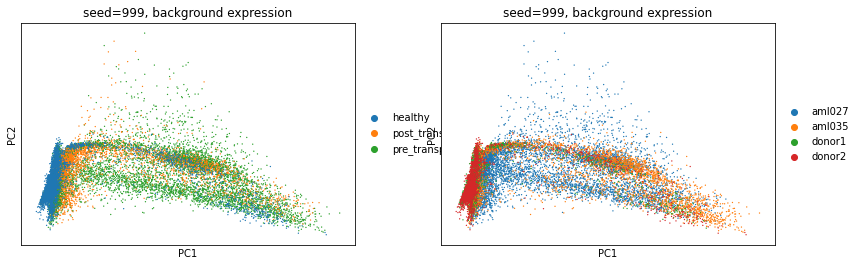

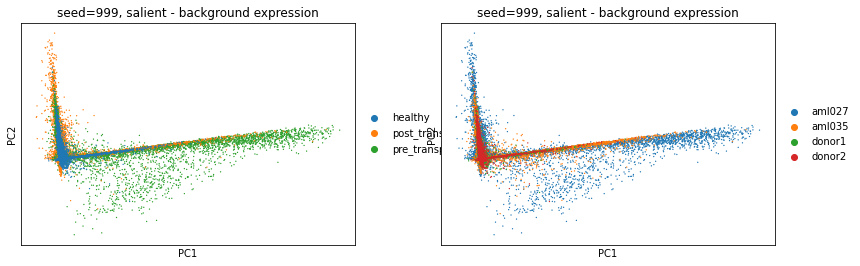

In [5]:
seeds = [123, 42, 789, 46, 999]
latent_size = 10
for seed in seeds:
    background_expr = np.load(
        os.path.join(
            constants.DEFAULT_RESULTS_PATH,
            f"{dataset}/contrastiveVI/latent_{latent_size}/{seed}",
            "background_normalized_expression.npy",
        ),
    )
    salient_expr = np.load(
        os.path.join(
            constants.DEFAULT_RESULTS_PATH,
            f"{dataset}/contrastiveVI/latent_{latent_size}/{seed}",
            "salient_normalized_expression.npy",
        ),
    )
    background_expr_adata = ad.AnnData(
        X=background_expr,
        obs=adata.obs,
        var=adata.var,
    )
    salient_expr_adata = ad.AnnData(
        X=salient_expr - background_expr,
        obs=adata.obs,
        var=adata.var,
    )
    title = f"seed={seed}, background expression"
    sc.tl.pca(background_expr_adata)
    sc.pl.pca(background_expr_adata, color=["condition", "patient_id"], title=[title, title])
    # sc.pp.neighbors(background_expr_adata)
    # sc.tl.umap(background_expr_adata)
    # sc.pl.umap(background_expr_adata, color=["condition", "patient_id"], title=[title, title])
    
    title = f"seed={seed}, salient - background expression"
    sc.tl.pca(salient_expr_adata)
    sc.pl.pca(salient_expr_adata, color=["condition", "patient_id"], title=[title, title])
    # sc.pp.neighbors(salient_expr_adata)
    # sc.tl.umap(salient_expr_adata)
    # sc.pl.umap(salient_expr_adata, color=["condition", "patient_id"], title=[title, title])